In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ak0212_average_daily_screen_time_for_children_path = kagglehub.dataset_download('ak0212/average-daily-screen-time-for-children')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/average-daily-screen-time-for-children/screen_time.csv


# Importing Libraries and Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print('setup completed xD')

setup completed xD


In [ ]:
file_path = '/kaggle/input/average-daily-screen-time-for-children/screen_time.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


In [ ]:
df.isna().sum()
df.duplicated().sum()
df.dtypes

Age                              int64
Gender                          object
Screen Time Type                object
Day Type                        object
Average Screen Time (hours)    float64
Sample Size                      int64
dtype: object

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                     198 non-null    object 
 4   Average Screen Time (hours)  198 non-null    float64
 5   Sample Size                  198 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.4+ KB


,Age,Average Screen Time (hours),Sample Size
count,198.000000,198.000000,198.000000
mean,10.000000,2.993030,400.000000
std,3.170294,1.922822,63.405872
min,5.000000,0.440000,300.000000
25%,7.000000,1.402500,340.000000
50%,10.000000,2.490000,400.000000
75%,13.000000,4.397500,460.000000
max,15.000000,8.190000,500.000000


In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')

In [ ]:
df = df.drop('sample_size', axis = 1)

In [ ]:
df.head()

,age,gender,screen_time_type,day_type,average_screen_time_hours
0,5,Male,Educational,Weekday,0.44
1,5,Male,Recreational,Weekday,1.11
2,5,Male,Total,Weekday,1.55
3,5,Male,Educational,Weekend,0.50
4,5,Male,Recreational,Weekend,1.44


# EDA

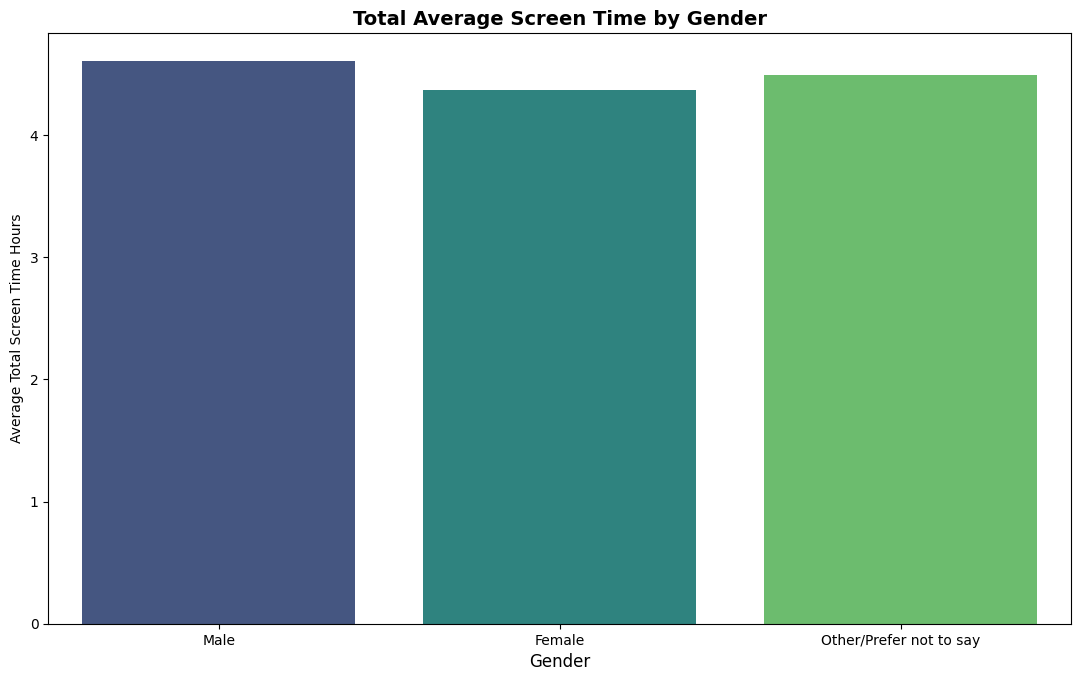

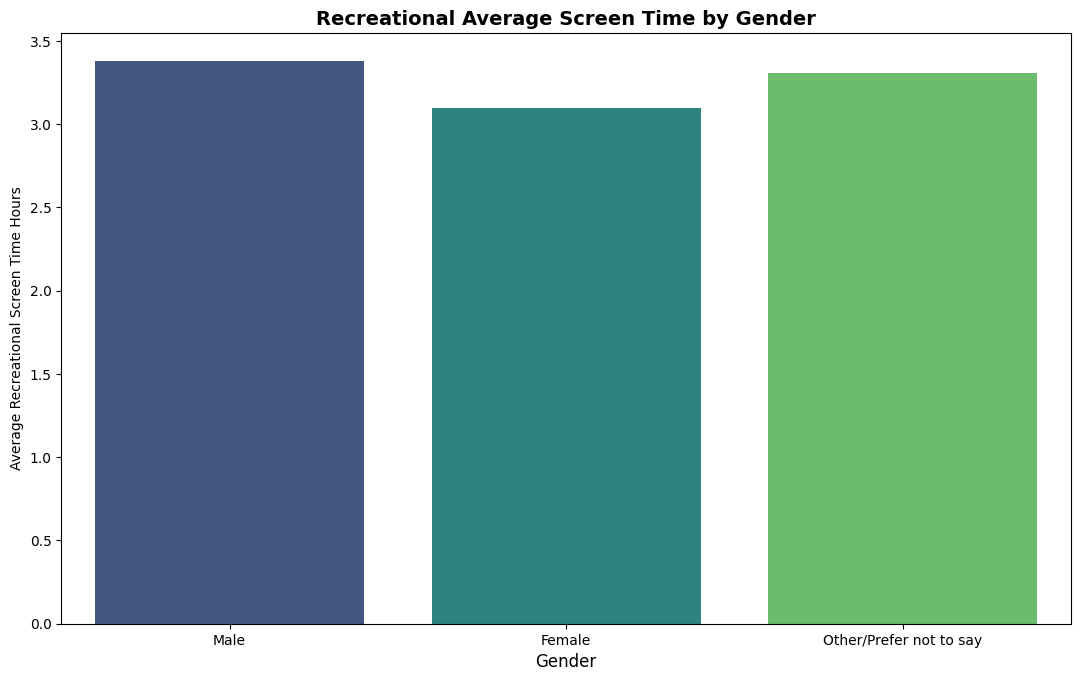

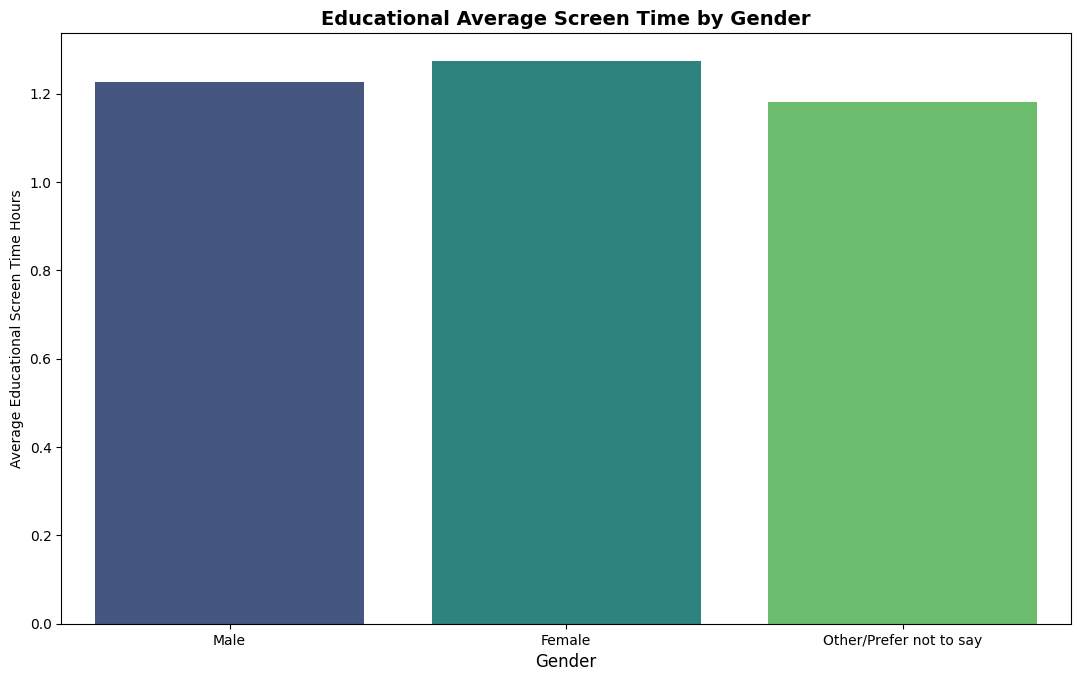

In [ ]:
df_filtered1 = df[df['screen_time_type']=='Total']
df_filtered2 = df[df['screen_time_type']=='Recreational']
df_filtered3 = df[df['screen_time_type']=='Educational']

dataframes = {
    'Total': df_filtered1,
    'Recreational' : df_filtered2,
    'Educational' : df_filtered3
}

for name, df_subsets in dataframes.items():
  plt.figure(figsize=(12,8))
  sns.barplot(
      data = df_subsets,
      x = 'gender',
      y = 'average_screen_time_hours',
      estimator = np.mean,
      errorbar = None,
      palette = 'viridis'
)
  plt.title(f'{name} Average Screen Time by Gender', size= 14, fontweight = 'bold')
  plt.ylabel(f'Average {name} Screen Time Hours')
  plt.xlabel('Gender', size = 12)
  plt.xticks(size=10)
  plt.tight_layout(pad=5)
  plt.show()


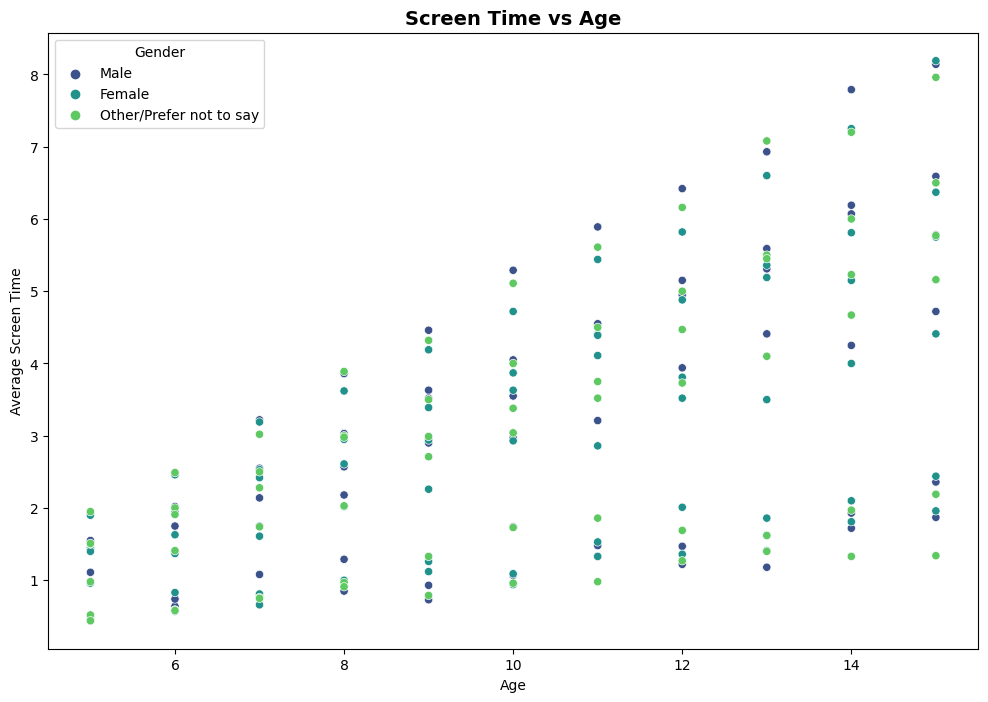

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = df,
    x = 'age',
    y = 'average_screen_time_hours',
    hue = 'gender',
    palette = 'viridis'
)

plt.legend(title='Gender')
plt.title('Screen Time vs Age', size = 14, fontweight = 'bold')
plt.xlabel('Age')
plt.ylabel('Average Screen Time')
plt.show()

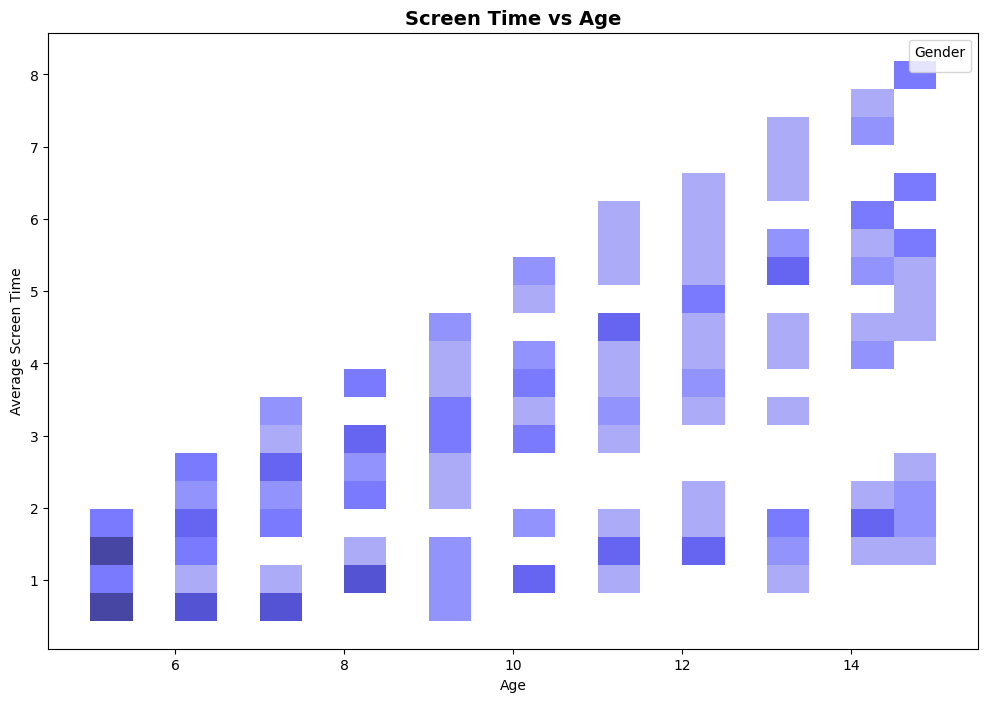

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(
    data = df,
    x = 'age',
    y = 'average_screen_time_hours',
    bins=20,
    kde=True,
    color='blue'
)

plt.legend(title='Gender')
plt.title('Screen Time vs Age', size = 14, fontweight = 'bold')
plt.xlabel('Age')
plt.ylabel('Average Screen Time')
plt.show()


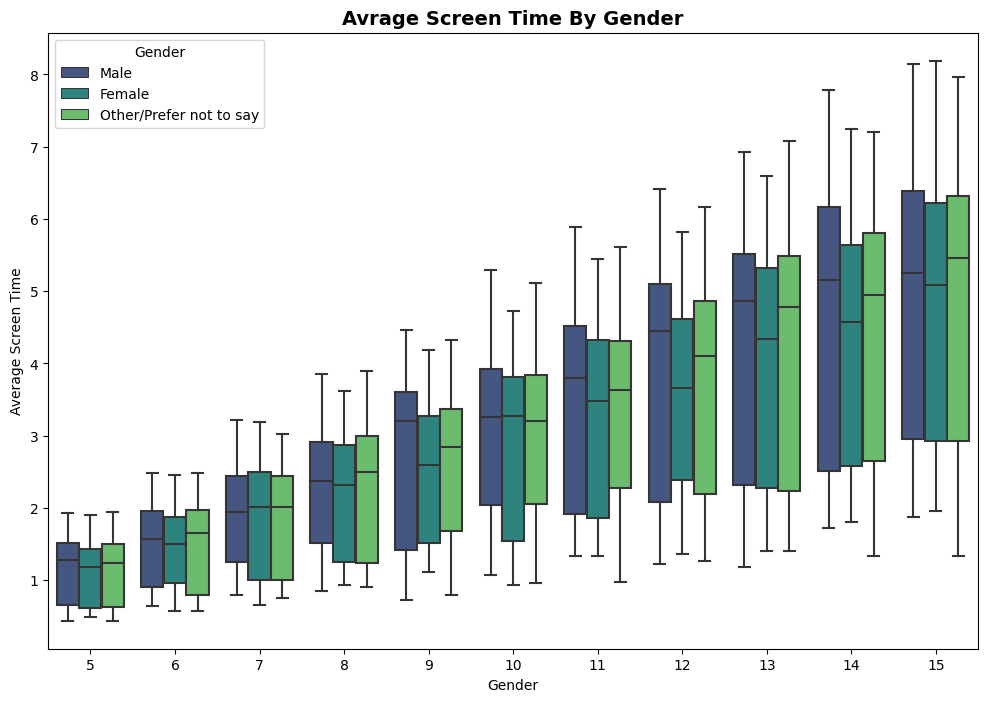

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(
    data = df,
    x = 'age',
    y = 'average_screen_time_hours',
    hue = 'gender',
    palette = 'viridis'
)

plt.legend(title = 'Gender', fontsize = 10)
plt.title('Avrage Screen Time By Gender', size = 14, fontweight = 'bold')
plt.xlabel('Gender')
plt.ylabel('Average Screen Time')
plt.show()

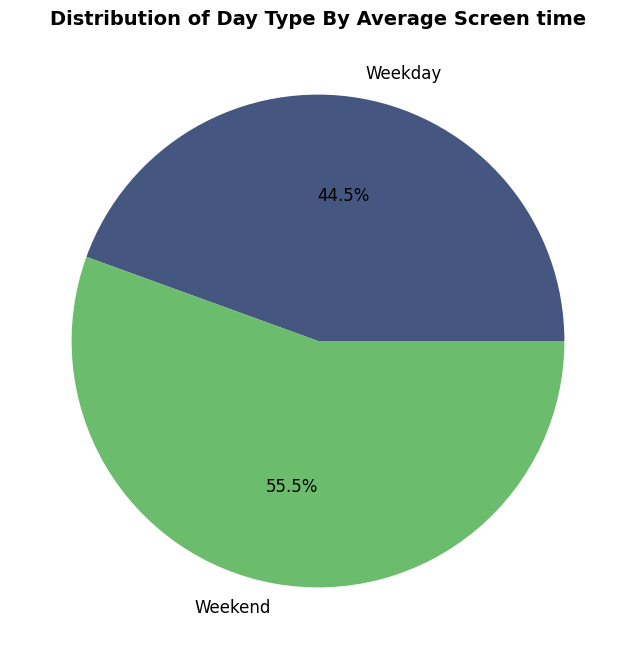

In [ ]:
df_daytype = df.groupby('day_type')['average_screen_time_hours'].mean().reset_index()
plt.figure(figsize=(12,8))
plt.pie(
    data = df_daytype,
    x = 'average_screen_time_hours',
    labels = 'day_type',
    autopct = '%1.1f%%',
    colors = ['#455681', '#6CBC6E'],
    textprops={'color': 'black', 'fontsize': 12}
)

plt.title('Distribution of Day Type By Average Screen time', size = 14, fontweight = 'bold')
plt.show()

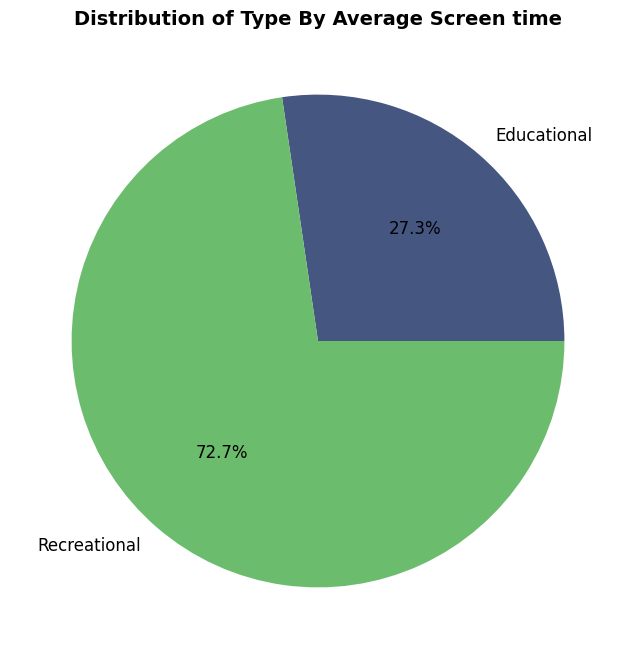

In [ ]:
df_filtered4 = df[df['screen_time_type']!='Total']
df_daytype = df_filtered4.groupby('screen_time_type')['average_screen_time_hours'].mean().reset_index()
plt.figure(figsize=(12,8))
plt.pie(
    data = df_daytype,
    x = 'average_screen_time_hours',
    labels = 'screen_time_type',
    autopct = '%1.1f%%',
    colors = ['#455681', '#6CBC6E'],
    textprops={'color': 'black', 'fontsize': 12}
)

plt.title('Distribution of Type By Average Screen time', size = 14, fontweight = 'bold')
plt.show()

# Correlation

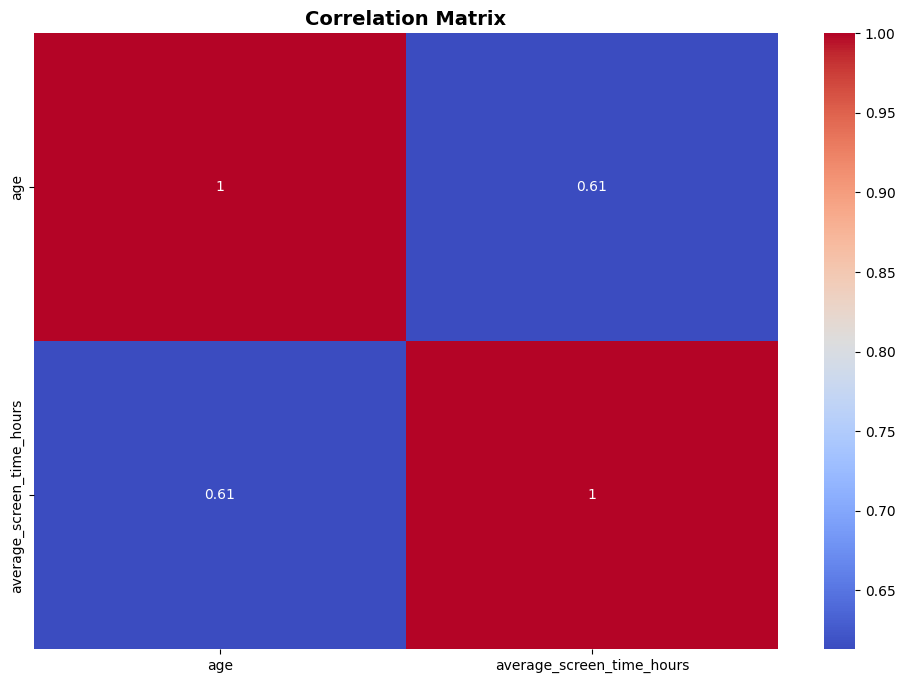

In [ ]:
num_columns = df.select_dtypes(include = [np.number])

plt.figure(figsize=(12,8))
sns.heatmap(
    num_columns.corr(),
    annot = True,
    cmap = 'coolwarm'
)

plt.title('Correlation Matrix', size=14, fontweight = 'bold')
plt.show()